In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('new2417.csv', index_col = 0)
print(data.head(2))
print()

print(data['Magnetic'].value_counts())

  Formula  SGnumber  Magmom  Magnetic
0  Ca4As4        14     0.0     False
1  In2Se2        12     0.0     False

False    1292
True     1125
Name: Magnetic, dtype: int64


In [2]:
from matminer.featurizers.conversions import StrToComposition
data_Composition = StrToComposition().featurize_dataframe(data, 'Formula')

from matminer.featurizers.conversions import CompositionToOxidComposition
data_Oxide = CompositionToOxidComposition().featurize_dataframe(data_Composition, 'composition')

from matminer.featurizers.composition import OxidationStates
data_OS = OxidationStates().featurize_dataframe(data_Oxide, 'composition_oxid')

from matminer.featurizers.composition import ElementProperty
ep_feat = ElementProperty.from_preset(preset_name='magpie')
data_EP = ep_feat.featurize_dataframe(data_OS, col_id = 'composition')
data_EP.head(2)

StrToComposition:   0%|          | 0/2417 [00:00<?, ?it/s]

CompositionToOxidComposition:   0%|          | 0/2417 [00:00<?, ?it/s]

OxidationStates:   0%|          | 0/2417 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/2417 [00:00<?, ?it/s]

,Formula,SGnumber,Magmom,Magnetic,composition,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Ca4As4,14,0.0,False,"(Ca, As)","(Ca2+, As3-, As-)",-3,2,5,2.683282,...,0.0,0.0,0.0,0.0,166.0,225.0,59.0,195.5,29.5,166.0
1,In2Se2,12,0.0,False,"(In, Se)","(In+, In3+, Se2-)",-2,3,5,2.683282,...,0.0,0.0,0.0,0.0,14.0,139.0,125.0,76.5,62.5,14.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV

In [4]:
y = data_EP['Magnetic'].values
excluded = ['Formula', 'Magmom', 'composition', 'composition_oxid', 'Magnetic']
X = data_EP.drop(excluded, axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size = 0.3,
                                                    random_state = 77)

In [6]:
modelBNB = BernoulliNB(binarize = 0.1, alpha = 1)
modelBNB.fit(X_train, y_train)
modelBNB.score(X_test, y_test)

0.6983471074380165

In [7]:
param_grid = {'binarize': np.arange(0, 1.1, 0.1),
              'alpha': np.arange(0, 1.1, 0.1),
              }
kfold = StratifiedKFold(n_splits = 10, shuffle=True,
                        random_state = 2)
model_BNB = GridSearchCV(BernoulliNB(),
                     param_grid, cv = kfold)

In [8]:
model_BNB.fit(X_train, y_train)

D:\Anaconda\install\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\Anaconda\install\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\Anaconda\install\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\Anaconda\install\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\Anaconda\install\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
D:\Anaconda\install\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=2, shuffle=True),
             estimator=BernoulliNB(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'binarize': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [9]:
model_BNB.score(X_test, y_test)

0.7575757575757576

In [10]:
model_BNB.best_params_

{'alpha': 0.8, 'binarize': 0.8}

In [11]:
model_BNB.best_score_

0.7315384615384615

In [12]:
model_BNB.best_estimator_

BernoulliNB(alpha=0.8, binarize=0.8)

In [13]:
model_bnb = BernoulliNB(alpha=0.8, binarize=0.8)
model_bnb.fit(X_train, y_train)
model_bnb.score(X_test, y_test)

0.7575757575757576

In [14]:
y_pred = model_BNB.predict(X_test)
y_pred.shape

(726,)

[[304  84]
 [ 92 246]]


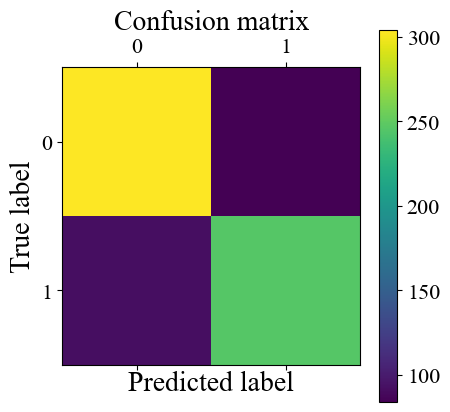

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman']
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix',fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.ylabel('True label', fontsize = 20)
plt.xlabel('Predicted label',fontsize = 20)
plt.savefig('c1.png', dpi = 300)
#plt.show()

In [25]:
#from sklearn.inspection import plot_partial_dependence
table = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
table

Predicted,False,True
Actual,,
False,304,84
True,92,246


In [26]:
table = np.array(table)
Accuracy = (table[0, 0] + table[1,1]) /np.sum(table)
Accuracy

0.7575757575757576

In [27]:
Error_rate = 1 - Accuracy
Error_rate

0.24242424242424243

In [28]:
Precision = table[1, 1]/(table[1, 1]+table[0, 1])
print('Precision:', Precision)

Sensitivity = table[1, 1]/(table[1, 0] + table[1,1])
print(Sensitivity)

Specificity = table[0, 0] /(table[0,0] + table[0, 1])
print(Specificity)

Recall = table[1, 1] /(table[0, 1] + table[1,1])
print(Recall)

cohen_kappa_score(y_test, y_pred)

Precision: 0.7454545454545455
0.727810650887574
0.7835051546391752
0.7454545454545455


0.5120967741935485

In [29]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred)) 

0.7365269461077844


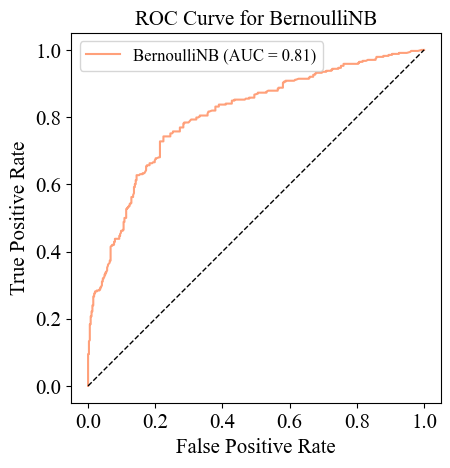

In [36]:
from sklearn.metrics import RocCurveDisplay
plt.rcParams['font.sans-serif']=['Times New Roman']

RocCurveDisplay.from_estimator(model_bnb, X_test, y_test, color = 'lightsalmon')
x = np.linspace(0, 1, 100)
plt.plot(x, x, 'k--', linewidth = 1)
plt.title('ROC Curve for BernoulliNB', fontsize = 15)
plt.axis('square')
plt.xlim()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate',fontsize = 15)
fontdict = {'family': 'Times New Roman',
            'size': 12}
            #'style': 'italic'}
plt.legend(prop=fontdict, loc = 'upper left')
plt.savefig('r1.png', dpi = 300)
#plt.show()

In [ ]:
df_ex = pd.read_csv('testset0.csv', index_col = 0)
df_ex.head(2)

In [ ]:
df_ex['Magmom'] = df_ex['Magmom'].round(3)
df_ex.head(2)

In [ ]:
df_ex = StrToComposition().featurize_dataframe(df_ex, 'Formula')
df_ex = CompositionToOxidComposition().featurize_dataframe(df_ex, 'composition')
df_ex = OxidationStates().featurize_dataframe(df_ex, 'composition_oxid')
ep_feat = ElementProperty.from_preset(preset_name='magpie')
df_ex = ep_feat.featurize_dataframe(df_ex, col_id = 'composition')
df_ex.head()

In [ ]:
excluded = ['Formula', 'Magmom', 'composition', 'composition_oxid', 'Magnetic']
X_validation = df_ex.drop(excluded, axis = 1)
X_validation
y_validation = df_ex['Magnetic'].values

In [ ]:
y_predv = model_bnb.predict(X_validation)
y_predv